Plot saved to: 5.Target Prediction\heatmap_targets.png


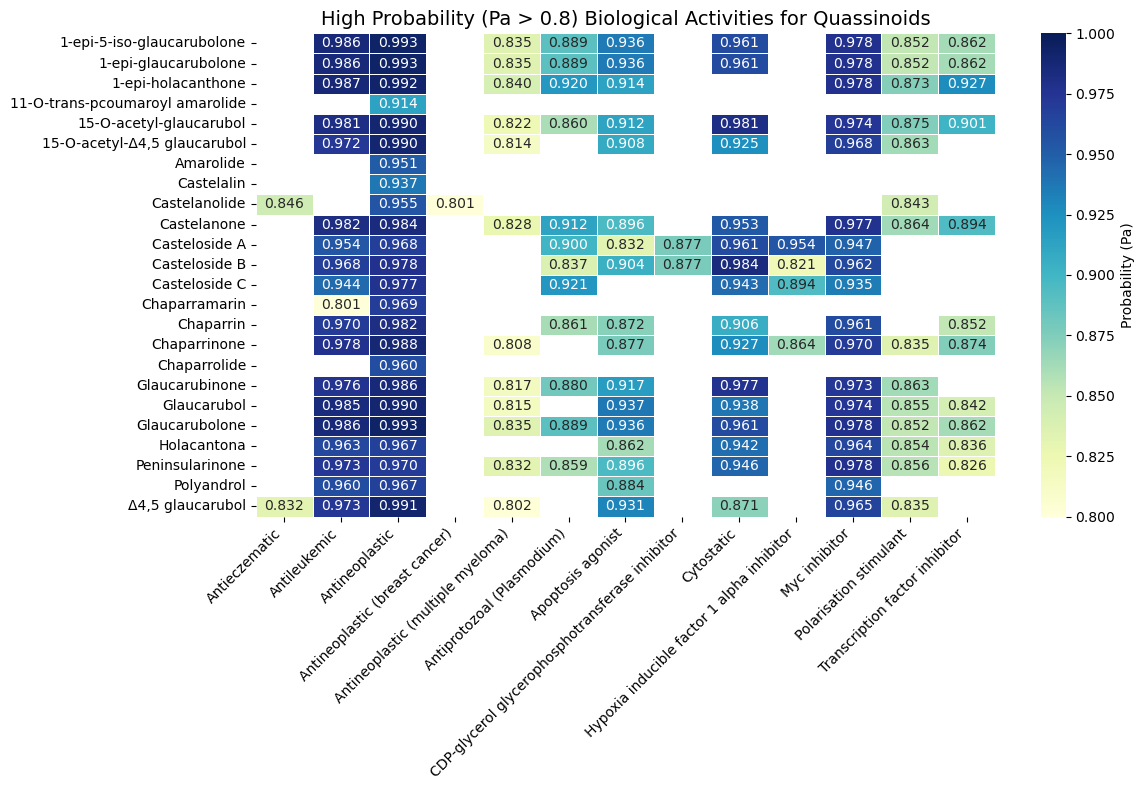

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 1. Setup Output Folder
folder_name = '5.Target Prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# 2. Load the data
df = pd.read_excel('cuasinoides.xlsx', sheet_name='target')

# 3. Clean Data: Convert probabilities to float 
df['Pa'] = df['Pa'].astype(str).str.replace(',', '.').astype(float)

# 4. Fix Typos in Activity names
df['Activity'] = df['Activity'].replace({
    'Immunosuppressan': 'Immunosuppressant',
    'Transcription factor inhibito': 'Transcription factor inhibitor'
})

# 5. Filter for High Probability (Pa > 0.8)
filtered_df = df[df['Pa'] > 0.8].copy()

# 6. Create the Matrix
pivot_df = filtered_df.pivot_table(index='Name', columns='Activity', values='Pa')

# 7. Generate the Heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(pivot_df, 
            cmap="YlGnBu",       # Color scheme
            annot=True,          # Show numbers
            fmt=".3f",           # 3 decimal places
            linewidths=.5,       
            vmin=0.8, vmax=1.0,  # Focus on 0.8 - 1.0 range
            cbar_kws={'label': 'Probability (Pa)'})

plt.title('High Probability (Pa > 0.8) Biological Activities for Quassinoids', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 8. Save to the specific folder
save_path = os.path.join(folder_name, 'heatmap_targets.png')
plt.savefig(save_path, dpi=300)
print(f"Plot saved to: {save_path}")

plt.show()

Plot saved to: 5.Target Prediction\heatmap_targets_resized.png


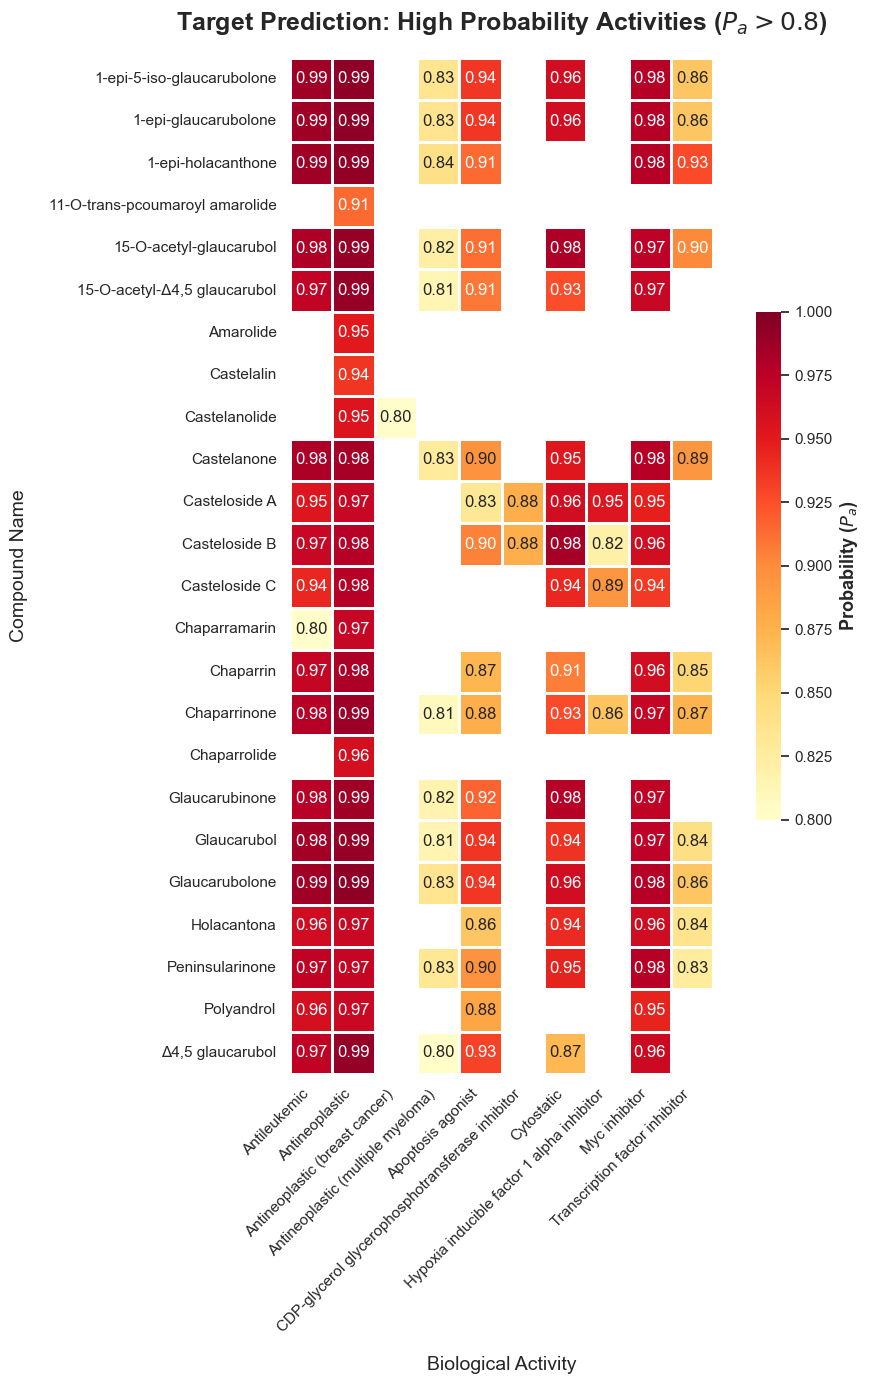

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 1. Setup Output Folder
folder_name = '5.Target Prediction'
os.makedirs(folder_name, exist_ok=True)

# 2. Load and Clean Data
df = pd.read_excel('cuasinoides.xlsx', sheet_name='target')
df['Pa'] = df['Pa'].astype(str).str.replace(',', '.').astype(float)
df['Activity'] = df['Activity'].replace({
    'Immunosuppressan': 'Immunosuppressant',
    'Transcription factor inhibito': 'Transcription factor inhibitor'
})

# 3. Filter Data (Pa > 0.8) & Remove Specific Activities
filtered_df = df[df['Pa'] > 0.8].copy()
activities_to_remove = ['Antiprotozoal (Plasmodium)', 'Polarisation stimulant', 'Antieczematic']
filtered_df = filtered_df[~filtered_df['Activity'].isin(activities_to_remove)]

# 4. Create Matrix
pivot_df = filtered_df.pivot_table(index='Name', columns='Activity', values='Pa')

# 5. Plot Setup
sns.set(style="white")
# CHANGED: Figure size set to (10, 14) to accommodate 24 rows vertically
plt.figure(figsize=(10, 14)) 

# 6. Generate Heatmap
ax = sns.heatmap(pivot_df, 
            cmap="YlOrRd", 
            annot=True, 
            fmt=".2f", 
            linewidths=1, 
            linecolor='white',
            vmin=0.8, vmax=1.0, 
            square=True,         # Keeps cells square
            cbar_kws={'label': 'Probability ($P_a$)', 'shrink': 0.5} # Shrink colorbar to match height
           )

# 7. Labels & Titles
ax.set_title('Target Prediction: High Probability Activities ($P_a > 0.8$)', 
             fontsize=18, pad=20, fontweight='bold')
ax.set_xlabel('Biological Activity', fontsize=14, labelpad=15)
ax.set_ylabel('Compound Name', fontsize=14, labelpad=15)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Colorbar Label
cbar = ax.collections[0].colorbar
cbar.set_label('Probability ($P_a$)', size=13, weight='bold')

plt.tight_layout()

# 8. Save
save_path = os.path.join(folder_name, 'heatmap_targets_resized.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to: {save_path}")

plt.show()